In [1]:
# Load necessary libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
# Set up FRED data connection
# Instructions for getting your FRED API key available at these websites
# https://pypi.org/project/fredapi/ 
# http://api.stlouisfed.org/api_key.html

from fredapi import Fred
fred = Fred(api_key='d45705d0636833c9b42e3e55f08f81ba')

# Total Patents Originating in the United States
temp = fred.get_series('PATENTUSALLTOTAL', observation_start='1992-01-01', observation_end='2020-01-01')
df_patents = pd.DataFrame(data=temp, columns=['Total_Patents_Originating_in_USA'])
df_patents = df_patents.rename_axis('Date').reset_index()
print(df_patents.head(29))

# Expenses for Research and Development In The Physical, Engineering, and Life Sciences, All Establishments, Employer Firms  
temp = fred.get_series('RADITPEALSE3154171', observation_start='2003-01-01', observation_end='2021-01-01')
df_rd_expenses = pd.DataFrame(data=temp, columns=['Research_and_Development_Expense'])
df_rd_expenses = df_rd_expenses.rename_axis('Date').reset_index()
print(df_rd_expenses.head(19))


         Date  Total_Patents_Originating_in_USA
0  1992-01-01                           58694.0
1  1993-01-01                           61226.0
2  1994-01-01                           64244.0
3  1995-01-01                           64399.0
4  1996-01-01                           69328.0
5  1997-01-01                           69860.0
6  1998-01-01                           90649.0
7  1999-01-01                           94040.0
8  2000-01-01                           96920.0
9  2001-01-01                           98594.0
10 2002-01-01                           97086.0
11 2003-01-01                           98563.0
12 2004-01-01                           94110.0
13 2005-01-01                           82562.0
14 2006-01-01                          102239.0
15 2007-01-01                           93665.0
16 2008-01-01                           91980.0
17 2009-01-01                           95032.0
18 2010-01-01                          121164.0
19 2011-01-01                          1

In [3]:
def plot_series(ax, df, cols, index='Date'):
    df = df.set_index(keys=index, drop=False)
    df.plot(ax=ax, x=index, y=cols, legend=False)
    return ax


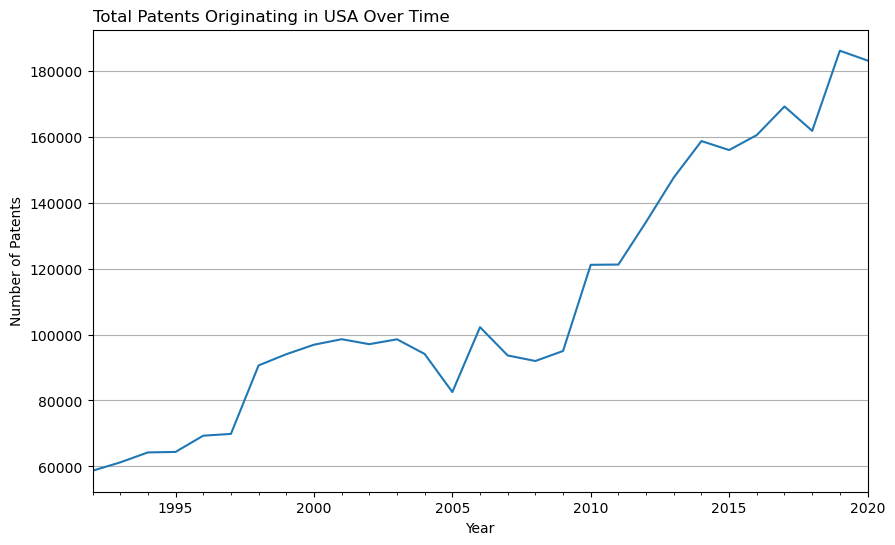

In [4]:
# Plot patents
fig, ax = plt.subplots(figsize=(10, 6))
plot_series(ax, df_patents, cols=['Total_Patents_Originating_in_USA'])
ax.set_title('Total Patents Originating in USA Over Time', loc='left')
ax.grid(axis='y')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Patents')
plt.show()

In [5]:
# Run OLS regression for total patents originating in the USA over time
df_patents['Year'] = df_patents['Date'].dt.year

df_rd_expenses['Year'] = df_rd_expenses['Date'].dt.year
X_patents = sm.add_constant(df_patents['Year'])  # Adding a constant to the model (i.e., the intercept)
model_patents = sm.OLS(df_patents['Total_Patents_Originating_in_USA'], X_patents)
results_patents = model_patents.fit()
print(results_patents.summary())


                                   OLS Regression Results                                   
Dep. Variable:     Total_Patents_Originating_in_USA   R-squared:                       0.890
Model:                                          OLS   Adj. R-squared:                  0.886
Method:                               Least Squares   F-statistic:                     218.2
Date:                              Mon, 23 Oct 2023   Prob (F-statistic):           1.87e-14
Time:                                      16:39:51   Log-Likelihood:                -315.07
No. Observations:                                29   AIC:                             634.1
Df Residuals:                                    27   BIC:                             636.9
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    


Note: Could not find new patent data separated by industry on FRED. Only shows total number of patents seperated by geographic location.

GPT Prompt: Iis there a way to import USPTO data in pytho?
GPT Answer: 

"Yes, the United States Patent and Trademark Office (USPTO) provides a vast amount of patent-related data, and you can access this data in various ways using Python. Here are some methods:

Bulk Data Storage System (BDSS):

The USPTO provides bulk data sets through its BDSS. You can manually download data sets from the USPTO Bulk Data Storage System webpage.
After downloading, you can use Python libraries like pandas to load, process, and analyze the data.
USPTO's PatentsView API:

PatentsView is a USPTO initiative to make patent data more accessible and usable. They offer a well-documented API to query patent data.
You can use Python's requests library to make API calls and fetch 

Python Libraries:

Some Python libraries or tools have been developed for specific tasks related to patent data. One such example is patentpy. You can use this library to fetch USPTO patent data in a more streamlined manner, though always ensure the tool or library is up-to-date with the current USPTO data structure.
Manual Download and Local Processing:

If you're working with a subset of patent data or if you want to ensure you have the most up-to-date data, you might consider manually downloading datasets from USPTO and then processing them locally using Python. This can sometimes be more reliable than relying on third-party libraries, especially if those libraries aren't regularly updated.
When working with USPTO data, always keep in mind the terms of use and any rate limits or restrictions that might apply, especially when making numerous requests to an 
API." -Chat GPT

the data.n

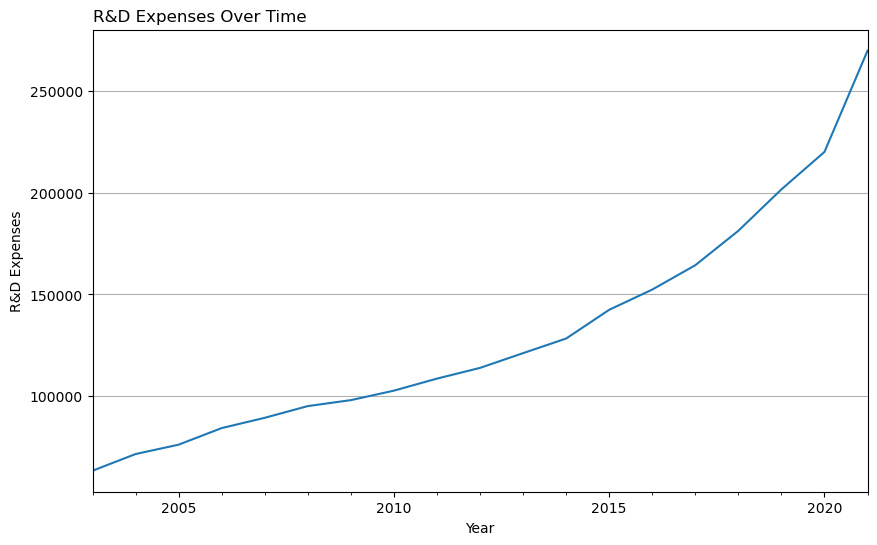

In [6]:
# Plot R&D expenses
fig, ax = plt.subplots(figsize=(10, 6))
plot_series(ax, df_rd_expenses, cols=['Research_and_Development_Expense'])
ax.set_title('R&D Expenses Over Time', loc='left')
ax.grid(axis='y')
ax.set_xlabel('Year')
ax.set_ylabel('R&D Expenses')
plt.show()

In [7]:
# Run OLS regression for reasearch and development expenses
df_rd_expenses['Year'] = df_rd_expenses['Date'].dt.year

X_rd = sm.add_constant(df_rd_expenses['Year'])  # Adding a constant to the model
model_rd = sm.OLS(df_rd_expenses['Research_and_Development_Expense'], X_rd)
results_rd = model_rd.fit()
print(results_rd.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Research_and_Development_Expense   R-squared:                       0.890
Model:                                          OLS   Adj. R-squared:                  0.884
Method:                               Least Squares   F-statistic:                     137.7
Date:                              Mon, 23 Oct 2023   Prob (F-statistic):           1.41e-09
Time:                                      16:39:51   Log-Likelihood:                -213.05
No. Observations:                                19   AIC:                             430.1
Df Residuals:                                    17   BIC:                             432.0
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
